# **Banking Dataset / Dataset de clientes y subscripciones a préstamos bancarios**

(basado en un fichero .CSV y la información del dataset ***Bank Marketing*** en la url = "https://archive.ics.uci.edu/dataset/222/bank+marketing")
## Exploratory Data Analysis (EDA) 


**Objetivos:**

- Presentación y análisis claros de estadísticas descriptivas (media, mediana, moda, desviación estándar, etc.) que faciliten una comprensión inicial del dataset.
- Identificación completa de valores faltantes y uso de técnicas adecuadas para gestionarlos, con una justificación breve de las decisiones tomadas.
- Identificación de outliers en las variables relevantes, con una estrategia de tratamiento aplicada y justificación.
- Análisis de la relación entre características y variable objetivo, aplicando métodos estadísticos o visuales, y elección razonada de las más relevantes.
- Análisis de la distribución de la variable objetivo para identificar desbalance y aplicar, si es necesario, técnicas de balanceo con justificación adecuada.
- Resumen claro y conciso que aborde los hallazgos principales de la EDA y las decisiones tomadas, indicando una visión general del estado de los datos para el modelado
- La tarea se entrega en el formato Jupyter Notebook en un repositorio de GitHub: https://github.com/cristinasprogrammingadventure/Projecte-Machine-Learning/blob/main/BankingDataset_EDA.ipynb

### Importación de bibliotecas

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# !pip install sweetviz
import sweetviz as sv

In [1]:
import sys
sys.prefix

import os

'C:\\Users\\Buba\\anaconda3'

In [24]:
# Set the working directory
os.chdir("C:/Users/Buba/Documents/CURSOS-PROGRAMACION/IT-Academy/Upskilling-ML-negoci/ML_BankingDataset")

# Verify the working directory
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\Buba\Documents\CURSOS-PROGRAMACION\IT-Academy\Upskilling-ML-negoci\ML_BankingDataset


### Cargar el dataset

In [127]:
# Load the dataset
data_raw = pd.read_csv('bank_dataset.CSV')

# Display basic information about the dataset
print(f"Dataset loaded: {data_raw.shape[0]} rows, {data_raw.shape[1]} columns")

Dataset loaded: 11162 rows, 17 columns


### Descripción del dataset

El conjunto contiene más de **11.162 registros y 17 columnas** con atributos como edad, ocupación, estado civil, nivel educativo, saldo y variables de contacto con el banco.  

- **age** (edad): La edad del cliente.  
- **job** (ocupación): La profesión o tipo de trabajo del cliente.  
- **marital** (estado civil): Estado civil del cliente (casado, soltero, divorciado).  
- **education** (educación): Nivel de educación del cliente (primaria, secundaria, terciaria).  
- **default** (morosidad): Si el cliente tiene deudas impagadas (sí/no).  
- **balance** (saldo): Saldo bancario del cliente.  
- **housing** (hipoteca): Si el cliente tiene un préstamo hipotecario (sí/no).  
- **loan** (préstamo): Si el cliente tiene un préstamo personal (sí/no).  
- **contact** (contacto): Método de contacto utilizado para llegar al cliente (teléfono, móvil, etc.).  
- **day** (día): Día del mes en que el cliente fue contactado.  
- **month** (mes): Mes en que el cliente fue contactado.  
- **duration** (duración): Duración de la conversación con el cliente en segundos.  
- **campaign** (campaña): Número de contactos realizados durante la campaña actual.  
- **pdays** (días desde el último contacto): Número de días desde el último contacto con el cliente.  
- **previous** (contactos previos): Número de contactos realizados en campañas anteriores.  
- **poutcome** (resultado de la campaña anterior): Resultado de la última campaña (éxito, fracaso, etc.).  
- **deposit** (depósito): Variable objetivo, si el cliente ha suscrito un depósito a término (sí/no).  

Desde la fuente del conjunto de datos, se indica que la variable **duration** afecta directamente el resultado (deposit). Sin embargo, como no se conoce antes de realizar la llamada, su inclusión en el modelo haría que las predicciones no sean realistas. Por tanto, debe descartarse del conjunto de variables predictoras y usarse solo con fines de evaluación comparativa. 
url = "https://archive.ics.uci.edu/dataset/222/bank+marketing"

### Información general del dataset

In [14]:
# Informació general del dataset
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


En la descripción general del dataset se observan dos tipos principales de variables: numéricas y categóricas. Los tipos de datos parecen lógicamente correctos en general. Por ejemplo, variables como age, balance, y duration están correctamente clasificadas como numéricas (float64 o int64), mientras que variables como job, marital, education, y deposit están definidas como categóricas (object). Sin embargo, hay algunas observaciones:

La variable deposit es la variable objetivo y debería transformarse a un formato binario (por ejemplo, 0 y 1) para facilitar su uso en algoritmos de clasificación.
Las variables pdays y previous tienen valores que requieren interpretación adicional, ya que su significado no es intuitivo y podrían necesitar preprocesamiento.
La columna month, aunque categórica, representa meses del año y podría beneficiarse de un tratamiento ordinal (por ejemplo, asignar valores numéricos en orden cronológico).
Estas observaciones sugieren que se realizarán algunas transformaciones para preparar los datos para el modelado

### Mostrar las primeras y últimas filas del dataset

In [12]:
data_raw

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39.0,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32.0,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43.0,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


Al observar las primeras y últimas filas del dataset, los datos parecen razonables en términos de coherencia. Sin embargo, se identifican posibles áreas que requieren ingeniería de características, limpieza adicional y transformaciones específicas para garantizar que sean utilizables en un modelo predictivo.

**Columnas con valores repetitivos o poco informativos:**

- **contact**: Contiene valores como 'unknown' que podrían ser categorizados como valores faltantes.

- **poutcome**: Incluye mayoritariamente 'unknown', lo cual podría limitar su valor predictivo y requerir una estrategia específica.
Columnas categóricas:

- **job**, **marital**, y **education** tienen múltiples categorías que podrían necesitar codificación en variables dummies o agrupación para evitar que el modelo tenga demasiadas dimensiones.
- **month** debería transformarse a un formato numérico que respete su orden temporal (ordinal).

**Outliers y valores extremos:**

- En las filas finales, valores como **pdays** = -1 y **balance** = 0 aparecen con frecuencia y podrían necesitar un tratamiento específico para determinar si son valores válidos o errores en los datos.

**Variables relacionadas con duración de llamadas:**

- **duration** muestra valores altos que posiblemente afecten la distribución. Esta variable, aunque correlacionada con la variable objetivo, possiblemente no se debería incluir en la fase de entrenamiento ya que depende de la interacción directa de un agente con el cliente; también podría introducir sesgos en la predicción.



### Valores faltantes | valores nulos por columna

In [83]:
# Check for missing values
missing_values = data_raw.isnull().sum() | data_raw.isna().sum()

In [ ]:
# Display the percentage of missing values in each column
missing_percentage = (missing_values / len(data_raw)) * 100
missing_data = pd.DataFrame({'missing_values': missing_values, 'percentage': missing_percentage})

# Only display columns with missing values
missing_data = missing_data[missing_data['missing_values'] > 0]

missing_data

,missing_values,percentage
age,10,0.089590
marital,5,0.044795
education,7,0.062713


La tabla muestra las columnas con valores faltantes, el número total de valores perdidos y su porcentaje respecto al total de observaciones. 

Lavariable **'age'** tiene 10 valores faltantes (0.09%), mientras que **'education'** tiene 7 valores faltantes (0.06%) y **'martial'**, 5 sobre los más de once mil onservaciones totales. Estos porcentajes son bajos y podrían gestionarse utilizando técnicas como imputación con la media, mediana o modas, dependiendo de la distribución de la variable.

### Descripción estadística del dataset

In [15]:
# Descripció estadística del dataset
data_raw.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Descripción estadística simplificada para variables numéricas 

Esta tabla muestra las estadísticas descriptivas de las variables numéricas, incluyendo la media, mediana, moda, desviación estándar, y los percentiles. 

La edad promedio de los clientes es de 41.24 años con una mediana de 39 años. La variable 'balance' muestra una alta variabilidad con una desviación estándar de 3225.41, lo que indica una distribución dispersa de los valores. Esto podría implicar que existen clientes con balances significativamente más altos o más bajos que el promedio, lo que puede a su vez generar outliers, lo que verificaremos más adelante. 

In [48]:
# Select numerical columns
numerical_columns = data_raw.select_dtypes(include=[np.number])

# Descriptive statistics for numerical columns
numerical_stats = numerical_columns.describe().transpose()

# Calculate mode for numerical columns
numerical_mode = numerical_columns.mode().iloc[0]

# Add mode to descriptive stats
numerical_stats['mode'] = numerical_mode
numerical_stats['median'] = numerical_columns.median()

# Display the descriptive statistics for numerical variables
numerical_stats[['mean', 'median', 'mode', 'std']].round(2)


,mean,median,mode,std
age,41.24,39.0,31.0,11.91
balance,1528.54,550.0,0.0,3225.41
day,15.66,15.0,20.0,8.42
duration,371.99,255.0,97.0,347.13
campaign,2.51,2.0,1.0,2.72
pdays,51.33,-1.0,-1.0,108.76
previous,0.83,0.0,0.0,2.29


**Observaciones sobre las variables numéricas**

A partir de las estadísticas descriptivas (media, mediana, moda, y desviación estándar) de las variables numéricas, podemos extraer las siguientes observaciones:

**age (edad):** 
Media: 41.24 años, Mediana: 39 años, Moda: 31 años. 

La media y la mediana están cercanas, lo que indica una distribución relativamente simétrica. Sin embargo, la moda de 31 años destaca como un grupo específico de clientes jóvenes que podrían ser representativos de una estrategia de segmentación específica. La desviación estándar (11.91) refleja una variabilidad moderada en las edades, con clientes distribuidos en un rango amplio. Esto podría confirmarse con un histograma.

**balance (saldo):** Media: 1528.54, Mediana: 550, Moda: 0.

La alta desviación estándar (3225.41) indica que los valores están muy dispersos.
Observación: La moda de 0 sugiere que muchos clientes tienen un saldo bancario igual a cero. Esto podría tratarse como una característica relevante para segmentar clientes. Los valores extremos (outliers) probablemente afectan la media y deben manejarse cuidadosamente.

**day (día del mes):** Media: 15.66, Mediana: 15, Moda: 20.

La baja desviación estándar (8.42) indica que los valores están distribuidos de manera uniforme dentro del rango permitido (1-31 días). Esto es esperable dado que los días corresponden a un calendario. Aunque útil para contextualizar la campaña, la variable podría no tener un impacto directo en el comportamiento del cliente y puede servir más como dato informativo que predictivo.

**duration (duración de la llamada):** Media: 371.99 segundos, Mediana: 255 segundos, Moda: 97 segundos.

La alta desviación estándar (347.13) muestra que la duración varía mucho.
Observación: Aunque esta variable es altamente correlacionada con el resultado (suscripción de depósitos), debe excluirse del modelado predictivo ya que está directamente influenciada por el éxito de la llamada.

**campaign (número de contactos en la campaña actual):** Media: 2.51, Mediana: 2, Moda: 1.

Observación: La moda indica que la mayoría de los clientes fueron contactados solo una vez, pero hay valores significativamente más altos que incrementan la media. Esto podría requerir transformación (por ejemplo, logarítmica).

**pdays (días desde el último contacto):** Media: 51.33, Mediana: -1, Moda: -1.

Observación importante: Un valor de -1 indica que no hubo contacto previo. Este valor debería manejarse como una categoría separada, ya que tiene un significado especial y no es un número real.

**previous (contactos previos):** Media: 0.83, Mediana: 0, Moda: 0.

Observación: La mayoría de los clientes no fueron contactados en campañas previas (moda = 0). Esta variable podría ser transformada en una categoría binaria (0 contactos vs. más de 0 contactos).


### EDA automático con Sweetviz

In [21]:
# EDA automàtic amb Sweetviz
report = sv.analyze(data_raw)
report.show_html('EDA_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Un EDA automático nos puede dar pistas para ver de antemano qué son los gráficos importantes y las variables a destacar.

### Distribuciones de las variables numéricas

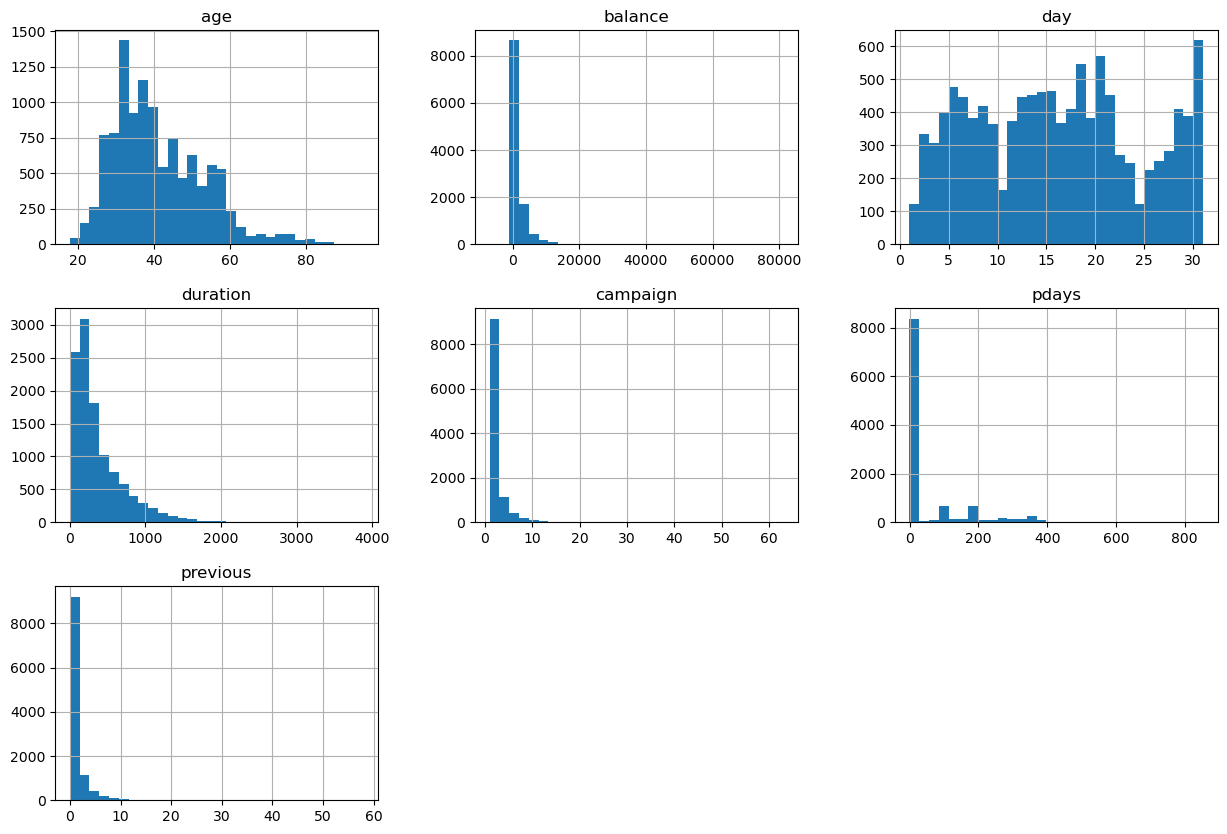

In [16]:
# Histograma de cada variable numèrica
data_raw.hist(bins=30, figsize=(15, 10))
plt.show()

- Se observa que ninguna de ellas tiene una distribución normal

- Se verificarán los días de contacto de la semnana, porque visualmente parece haber una discrepancia entre el cálculo y el histograma. 

In [116]:
# Frequency count for the 'day' variable
day_counts = data_raw['day'].value_counts()
print(day_counts.sort_index())


day
1     122
2     334
3     306
4     402
5     477
6     447
7     382
8     419
9     364
10    163
11    373
12    445
13    453
14    463
15    466
16    369
17    411
18    548
19    384
20    570
21    452
22    269
23    245
24    122
25    224
26    252
27    284
28    410
29    388
30    478
31    140
Name: count, dtype: int64


- Vemos que los **días 20 y 18 del mes** son los más frecuentes para este tipo de contacto, y que la discrepancia pasa dado que el histograma tiene 30 barras y hay meses que tienen 28, 29, 30 o 31 días, por lo que la distribución de las barras realmente no ilustra cada día del mes. Otros días importantes son el 5 y el 30.

In [117]:
# Group 'day' into early, mid, and late ranges
data_raw['day_group'] = pd.cut(
    data_raw['day'], 
    bins=[0, 10, 20, 31], 
    labels=['Early Month', 'Mid Month', 'Late Month']
)

# Count frequencies in each group
day_group_counts = data_raw['day_group'].value_counts()
print(day_group_counts)


day_group
Mid Month      4482
Early Month    3416
Late Month     3264
Name: count, dtype: int64


In [124]:
data_raw = data_raw.drop('day_group', axis=1)


- verificamos que es efectivamente el la mitad del mes que más se contacta a los clientes 

### Descripción estadística para variables categoricas 

In [17]:
# Definimos las columnas de variables categóricas

data_raw.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

**Mostrar el valor "moda", o más frecuente de cada variable**

In [81]:
# Show mode for each categorical column
categorical_mode = categorical_columns.mode().iloc[0]

print(categorical_mode)

job          management
marital         married
education     secondary
default              no
housing              no
loan                 no
contact        cellular
month               may
poutcome        unknown
deposit              no
Name: 0, dtype: object


**Observaciones sobre las variables categóricas**. A partir de las modas de las variables categóricas, se pueden extraer las siguientes observaciones:

- **job (ocupación):** La moda es ***management***. Esto indica que la mayoría de los clientes trabaja en roles administrativos o de gestión.

- **marital (estado civil):** La moda es ***married***. Esto sugiere que la mayoría de los clientes están casados, lo cual podría ser una característica relevante para el análisis.

- **education (nivel educativo):** La moda es ***secondary***, lo que refleja que la mayoría de los clientes tiene un nivel educativo secundario.

- **default (morosidad):** La moda es ***no***, lo que implica que la mayoría de los clientes no tiene deudas pendientes.

- **housing (hipoteca):** La moda es ***no***, indicando que muchos clientes no tienen hipoteca.

- **loan (préstamo):** La moda es ***no***, lo que muestra que la mayoría de los clientes no tiene préstamos personales.

- **contact (tipo de contacto):** La moda es ***cellular***. Esto sugiere que el método principal de contacto es por teléfono móvil.

- **month (mes):** La moda es ***may***. Indica que mayo es el mes más común en el que se contacta a los clientes.

- **poutcome (resultado de campañas anteriores):** La moda es ***unknown***, lo que muestra que no hay información sobre la mayoría de los clientes en esta variable, lo cual podría limitar su relevancia para el modelo.

- **deposit (suscripción):** La moda es ***no***. Esto indica que la mayoría de los clientes no suscribió un depósito a término.


### *Class Imbalance* en la Variable Objetivo

In [79]:
# Check the distribution of the target variable
deposit_distribution = data_raw['deposit'].value_counts(normalize=True)

deposit_distribution


deposit
no     0.52616
yes    0.47384
Name: proportion, dtype: float64

Los dos valores categóricos de la variable target son bastante equilibradas. Las clases están relativamente equilibradas, ya que la diferencia entre ambas es pequeña (aproximadamente un 5%). Este nivel de balance es positivo para el modelado, ya que no requiere técnicas avanzadas de balanceo como sobremuestreo o submuestreo.

La variable objetivo deposit presenta un balance aceptable entre las clases yes (47.38%) y no (52.62%). Aunque la clase no es ligeramente mayoritaria, esta diferencia no es lo suficientemente significativa como para justificar técnicas de balanceo. Por tanto, los modelos predictivos deberían manejar adecuadamente este nivel de balance, sin riesgo importante de sesgo hacia una clase específica. No obstante, se monitorearán métricas como el F1-score y la matriz de confusión para garantizar un rendimiento equilibrado entre las clases.

### Calcular los valores de cada variable categórica

Calcularemos los valores de cada variable y después los mostraremos graficamente.

In [70]:
# Store frequency counts for each categorical column in a dictionary
frequency_counts = {}
for column in categorical_columns:
    frequency_counts[column] = categorical_columns[column].value_counts()

# Display the counts with formatted column names
for column, counts in frequency_counts.items():
    print(f"Frequency counts for (\033[1m{column}\033[0m):")
    print(counts)
    print("\n")

Frequency counts for (job):
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64


Frequency counts for (marital):
marital
married     6349
single      3517
divorced    1291
Name: count, dtype: int64


Frequency counts for (education):
education
secondary    5474
tertiary     3685
primary      1500
unknown       496
Name: count, dtype: int64


Frequency counts for (default):
default
no     10994
yes      168
Name: count, dtype: int64


Frequency counts for (housing):
housing
no     5881
yes    5281
Name: count, dtype: int64


Frequency counts for (loan):
loan
no     9702
yes    1460
Name: count, dtype: int64


Frequency counts for (contact):
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64


Frequency counts fo

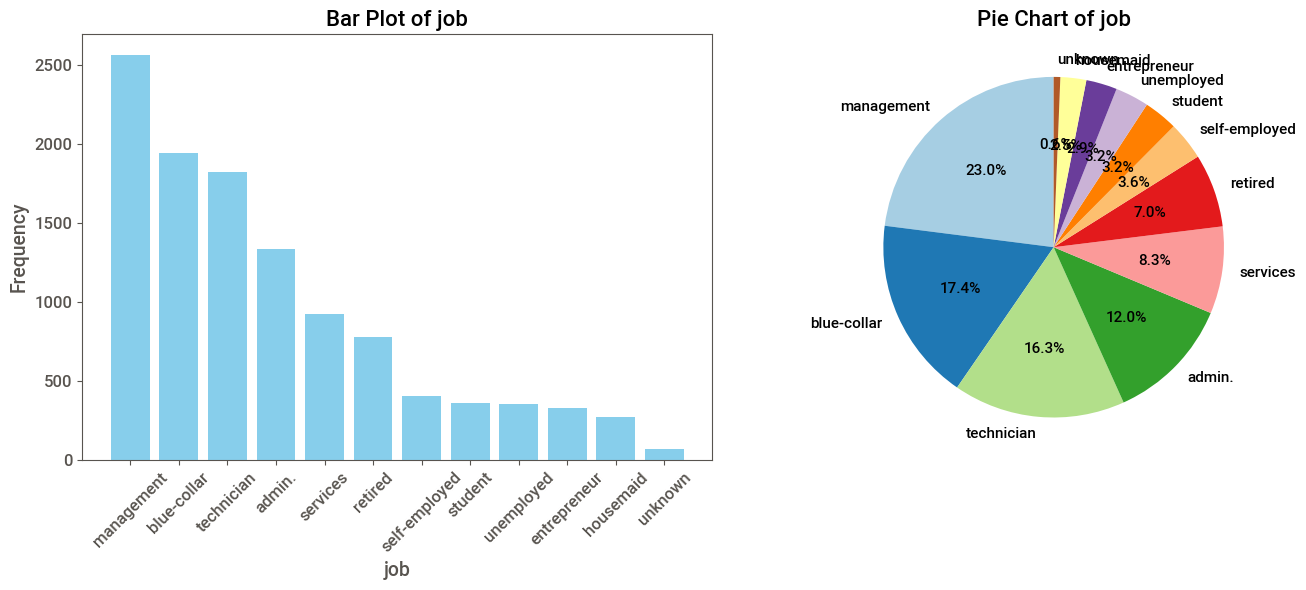

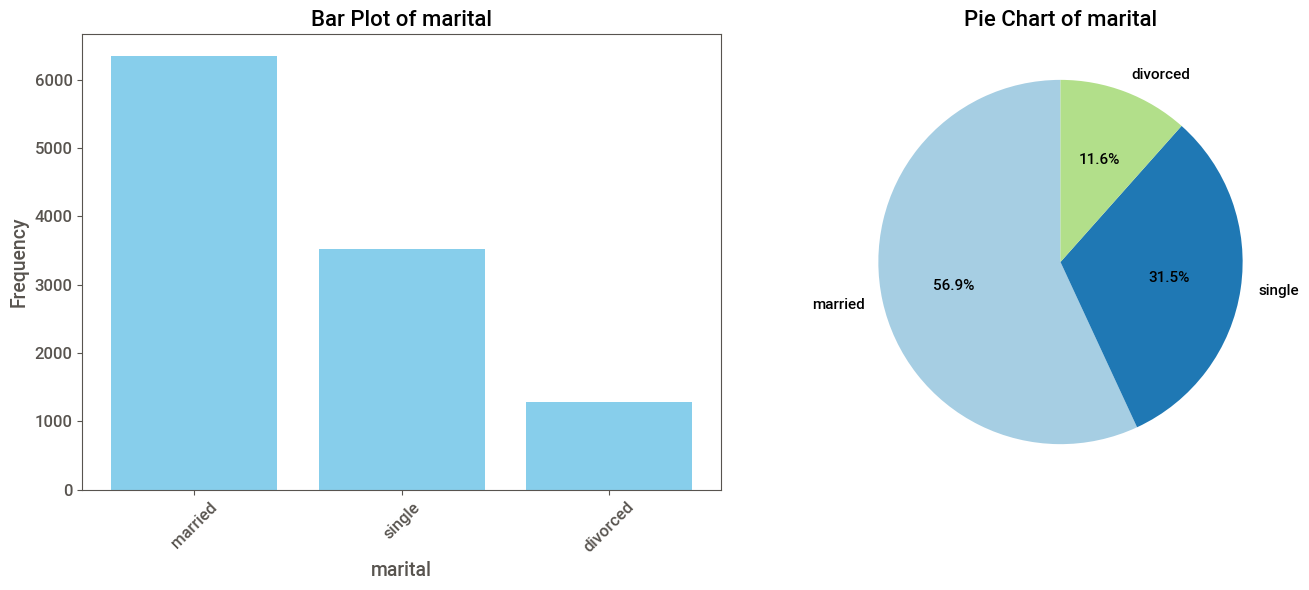

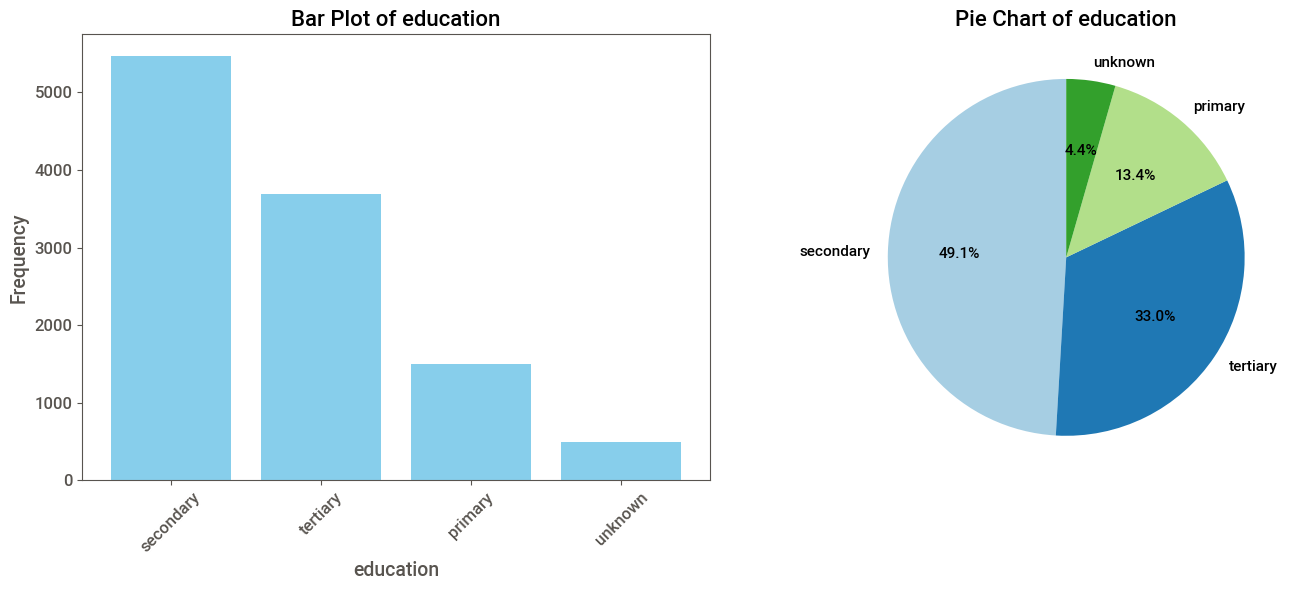

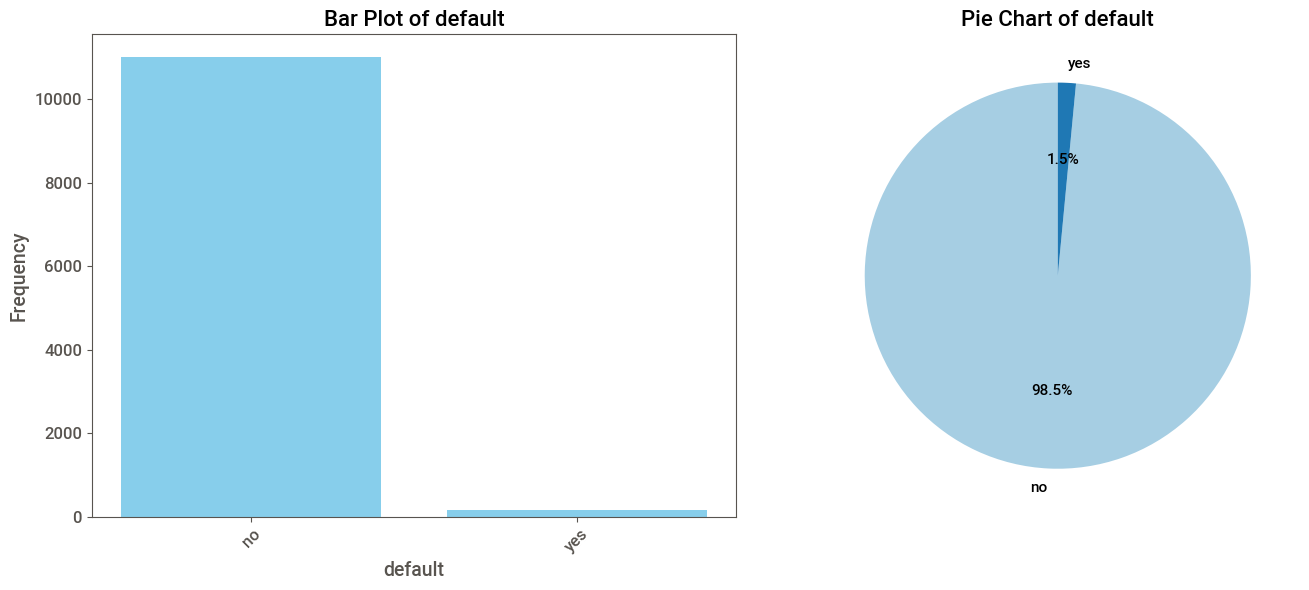

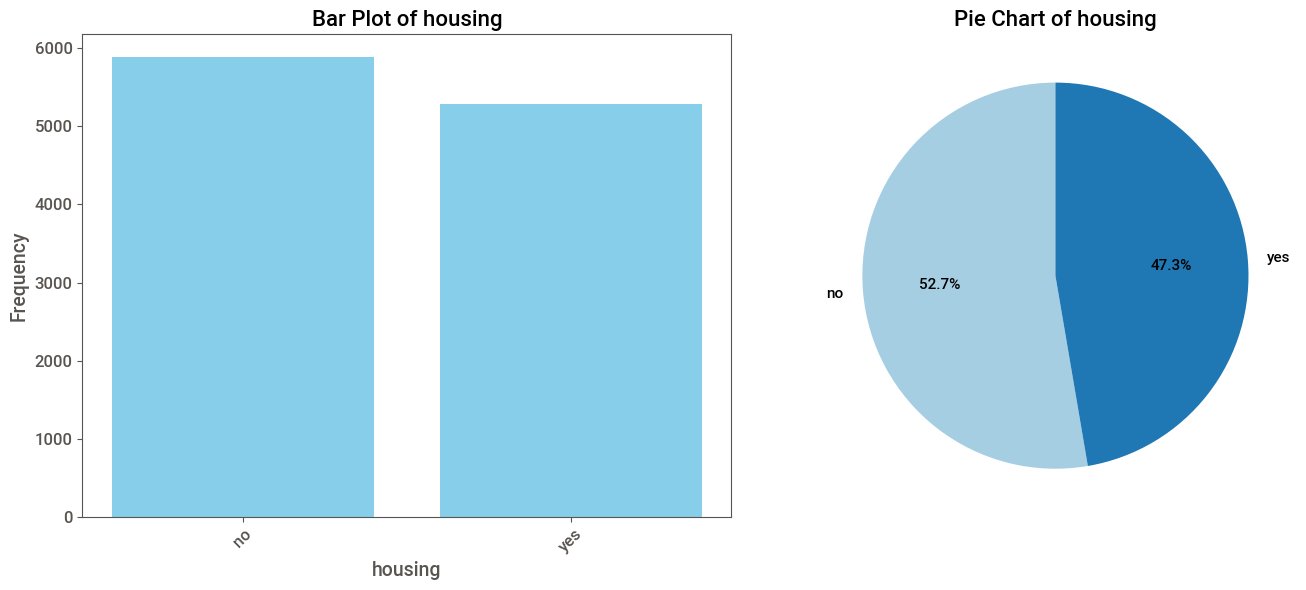

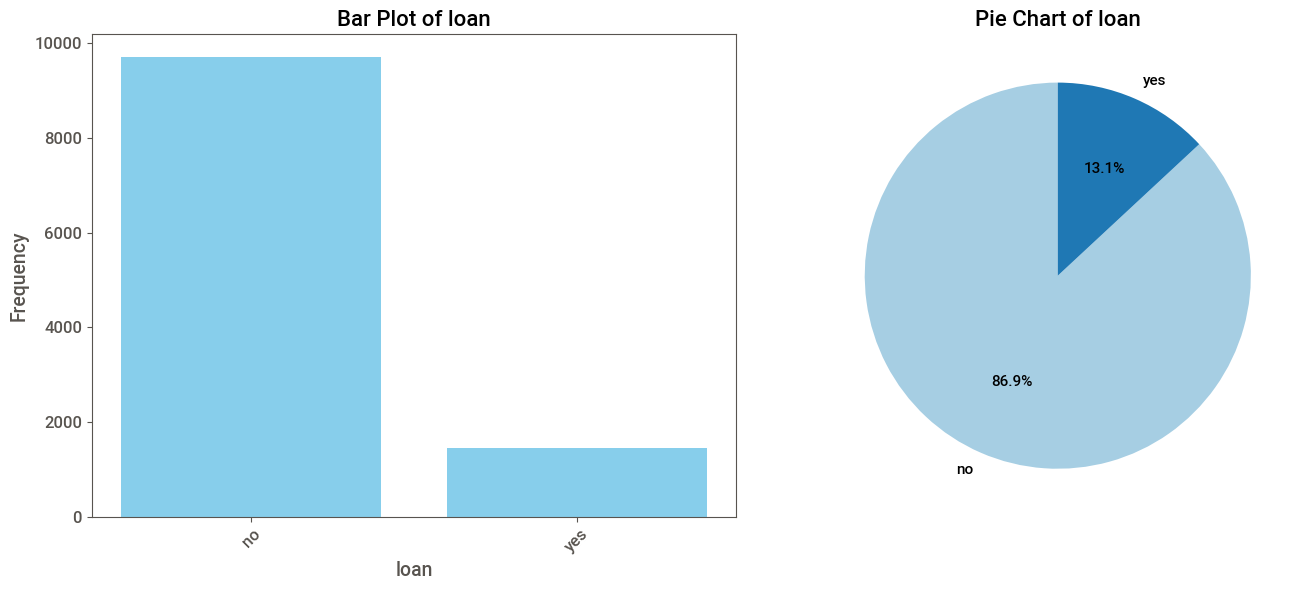

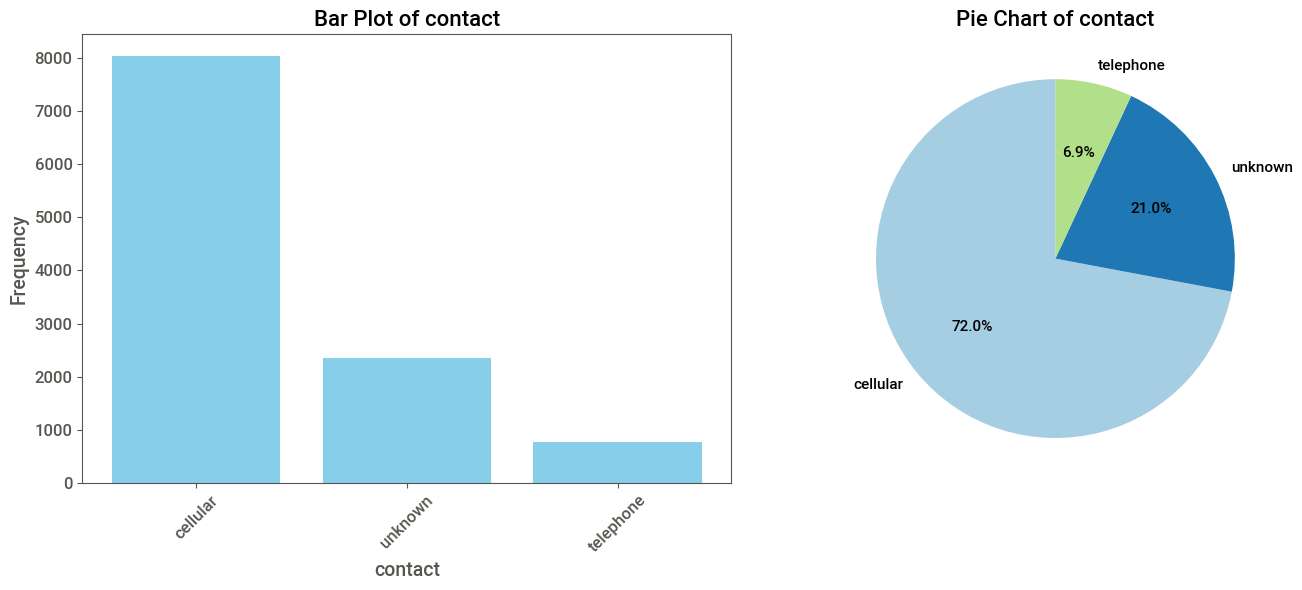

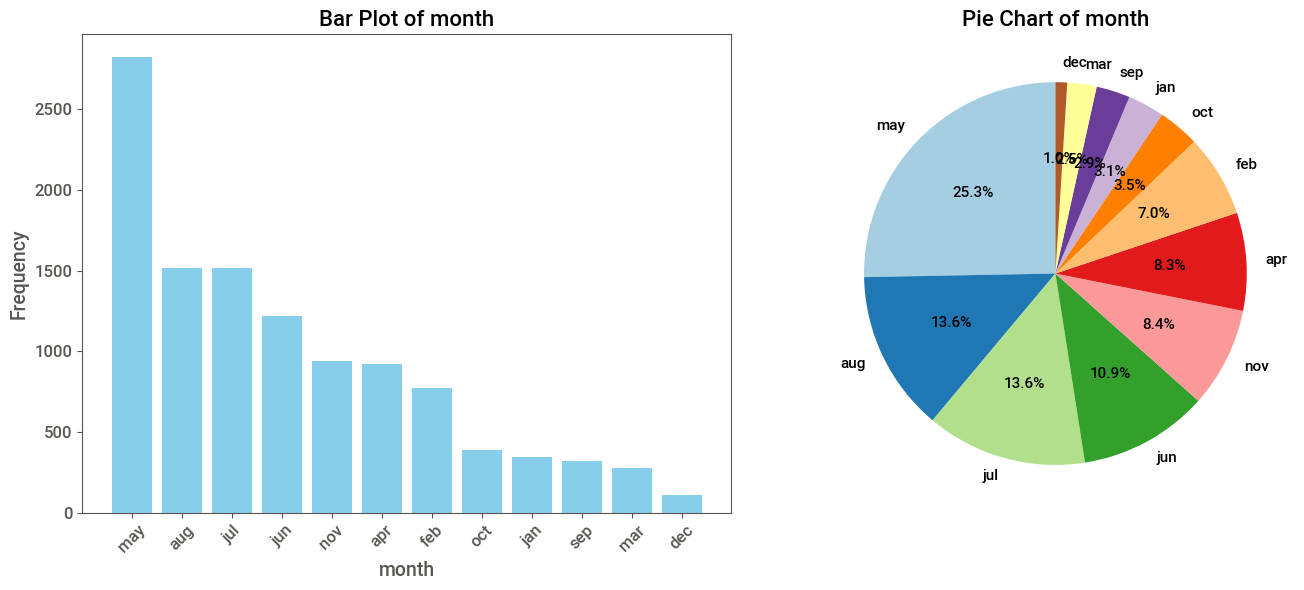

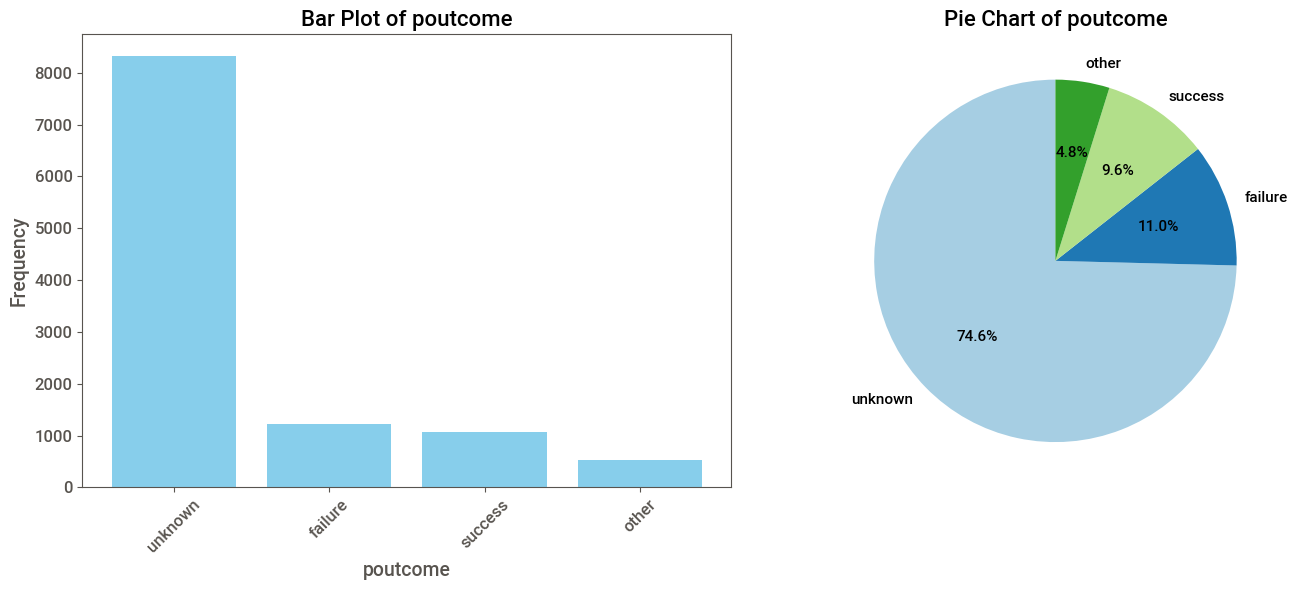

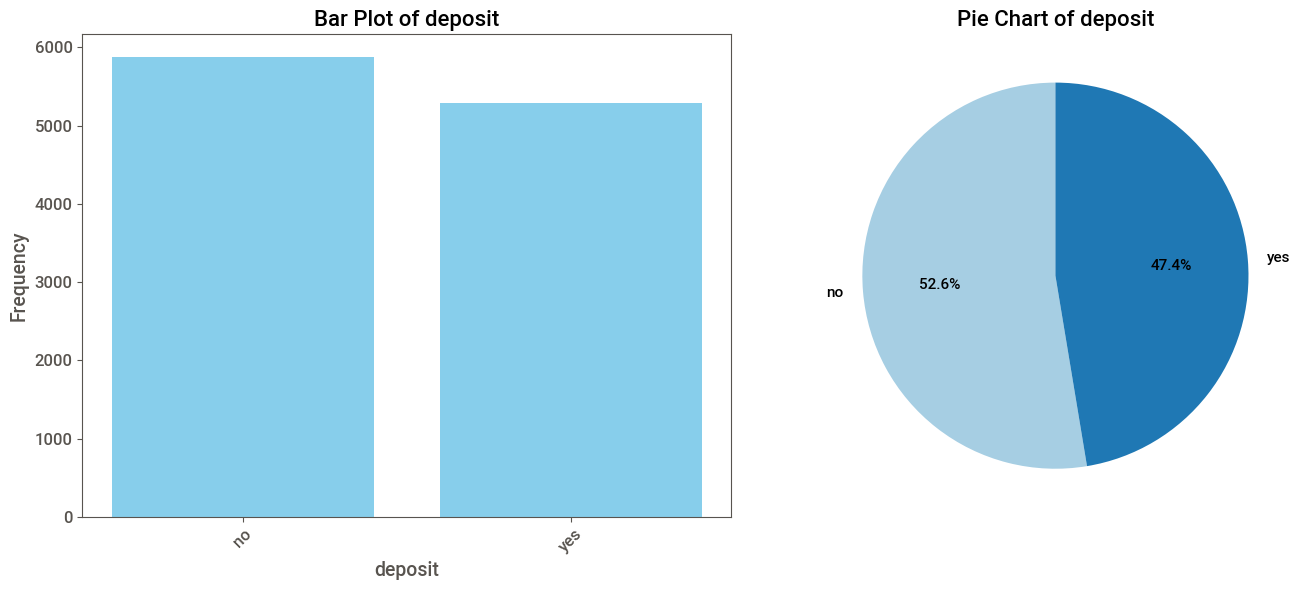

In [85]:
import matplotlib.pyplot as plt

# Loop through each categorical column to create bar and pie charts
for column, counts in frequency_counts.items():
    
    # Create a figure with two subplots (bar plot and pie chart)
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Bar plot
    axes[0].bar(counts.index, counts.values, color='skyblue')
    axes[0].set_title(f'Bar Plot of {column}', fontsize=16)  # Increase title font size
    axes[0].set_xlabel(column, fontsize=14)  # Increase x-axis label font size
    axes[0].set_ylabel('Frequency', fontsize=14)  # Increase y-axis label font size
    axes[0].tick_params(axis='x', rotation=45, labelsize=12)  # Increase x-axis tick labels size
    axes[0].tick_params(axis='y', labelsize=12)  # Increase y-axis tick labels size

    # Pie chart
    axes[1].pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    axes[1].set_title(f'Pie Chart of {column}', fontsize=16)  # Increase title font size
    plt.setp(axes[1].texts, fontsize=11)  # Increase font size of pie chart labels

    # Display the plots
    plt.tight_layout()
    plt.show()


**Bar Plots - Pie Charts**

Estas fuguras ayudan a identificar valores frecuentes o irrelevantes, crucial para la selección de características y la simplificación del dataset antes del modelado. Los gráficos de barras y de tarta proporcionan una visión clara de la distribución de las categorías en cada variable y cumplen una función importante en las decisiones sobre datos (basadas en los gráficos).

**Variables dominantes:** Se observa que la mayoría de los clientes pertenecen a categorías como management en job, married en marital, y no en housing.

**Valores desequilibrados:** Algunas categorías como unknown en poutcome o contact pueden no aportar información valiosa para el modelo debido a su falta de detalle o frecuencia alta pero poco significativa.

También vemos que la gran mayoría de clientes contactados no tienen deudas pendientes y que más o menos la mitad son propietarios dee una casa para la que tienen una hipoteca. El mes de contacto (month) puede ser que sea decisión de los bancos más que de los clientes.


### Detección de outliers, o valores atípicos

C:\Users\Buba\AppData\Local\Temp\ipykernel_19576\2256314259.py:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = sorted_outlier_percentages[idx]
C:\Users\Buba\AppData\Local\Temp\ipykernel_19576\2256314259.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


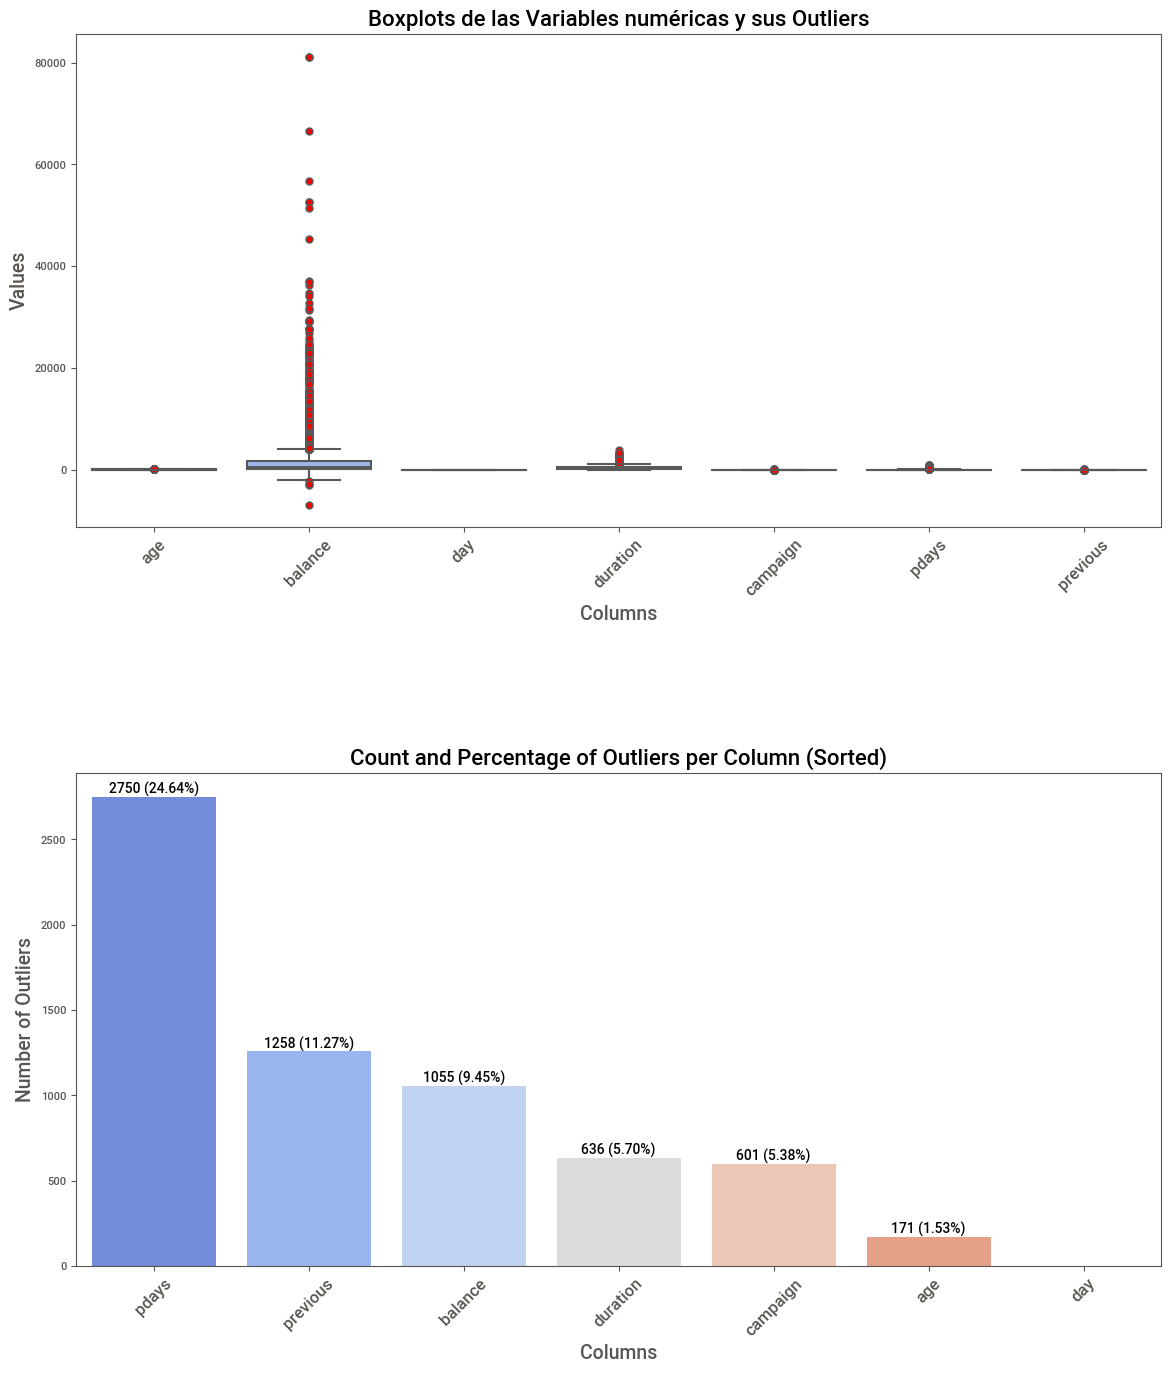

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 16), gridspec_kw={'hspace': 0.5})

# --- First Subplot: Boxplots ---
numeric_data = data_raw.select_dtypes(include=[np.number])
melted_data = numeric_data.reset_index().melt(id_vars=["index"], var_name="Variable", value_name="Value")

sns.boxplot(
    x="Variable",  # Variables (column names) on x-axis
    y="Value",     # Values on y-axis
    data=melted_data,
    palette="coolwarm",
    flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 5},
    orient="v",  # Vertical orientation
    ax=axes[0]
)

# Adding aesthetics for the first subplot
axes[0].set_title("Boxplots de las Variables numéricas y sus Outliers", fontsize=16)
axes[0].set_xlabel("Columns", fontsize=14)
axes[0].set_ylabel("Values", fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)

# --- Second Subplot: Outlier Counts and Percentages ---
# Detect outliers using the IQR method
def detect_outliers_iqr(data):
    outliers = {}
    for col in data.select_dtypes(include=[np.number]):  # Only numeric columns
        Q1 = np.percentile(data[col].dropna(), 25)  # First quartile
        Q3 = np.percentile(data[col].dropna(), 75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Detect outliers
        outlier_mask = (data[col] < lower_bound) | (data[col] > upper_bound)
        outliers[col] = outlier_mask.sum()  # Count outliers
    return outliers

# Detect outliers and calculate percentages
outliers_dict = detect_outliers_iqr(data_raw)
outliers_series = pd.Series(outliers_dict)
total_observations = len(data_raw)
outlier_percentages = (outliers_series / total_observations) * 100

# Sort outliers and percentages by the number of outliers
sorted_outliers_series = outliers_series.sort_values(ascending=False)
sorted_outlier_percentages = outlier_percentages[sorted_outliers_series.index]

# Barplot for sorted outlier counts and percentages
sns.barplot(
    x=sorted_outliers_series.index,
    y=sorted_outliers_series.values,
    palette="coolwarm",
    ax=axes[1]
)

# Annotate bars with counts and percentages
for idx, value in enumerate(sorted_outliers_series):
    if value > 0:
        percentage = sorted_outlier_percentages[idx]
        axes[1].text(
            x=idx,
            y=value + 0.1,
            s=f"{value} ({percentage:.2f}%)",
            ha="center", 
            va="bottom",
            fontsize=10,
            color="black"
        )

# Adding aesthetics for the second subplot
axes[1].set_title("Count and Percentage of Outliers per Column (Sorted)", fontsize=16)
axes[1].set_ylabel("Number of Outliers", fontsize=14)
axes[1].set_xlabel("Columns", fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=12)

# Final layout adjustments and show
plt.tight_layout()
plt.show()


Los boxplots revelan la presencia de valores atípicos significativos en columnas como **balance** y **duration**. Estos valores podrían influir negativamente en los modelos predictivos y pueden requerir técnicas de manejo como la imputación o el recorte de valores extremos (preferiblemente imputar o escalar la variable entera y no recortar los datos).

In [109]:
# Optionally, sort by the number of outliers
sorted_outliers_df = outliers_df.sort_values(by="Number of Outliers", ascending=False)
print("\nSorted by number of outliers:")
sorted_outliers_df


Sorted by number of outliers:


,Column,Number of Outliers,Percentage of Outliers
5,pdays,2750,24.637162
6,previous,1258,11.270382
1,balance,1055,9.451711
3,duration,636,5.697904
4,campaign,601,5.384340
0,age,171,1.531984
2,day,0,0.000000


La tabla identifica el número y porcentaje de outliers por variable numérica según el método IQR. Las variables con más outliers son **'pdays' (24.6%)** y **'previous' (11.27%)**. Esto indica que ciertos valores en estas columnas están muy alejados de los cuartiles centrales. 

Los outliers pueden influir en el modelo predictivo, por lo que deberemos decidir si tratarlos o conservarlos dependiendo de su relevancia para el objetivo del análisis.

### Correlaciones

Hay que verificar las correlaciones entre todas las variables y el **Target dummificado**

Para dummificar la variable objetivo deposit, que contiene valores categóricos (yes/no), la convertiremos en una columna binaria con 1 para yes y 0 para no.

In [128]:
# Convertir la variable objetivo 'deposit' en una binaria (1 para 'yes', 0 para 'no')
data_raw['deposit'] = data_raw['deposit'].map({'yes': 1, 'no': 0})

# Confirmar el cambio
print(data_raw['deposit'].value_counts())


deposit
0    5873
1    5289
Name: count, dtype: int64


In [129]:
data_raw

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,0
11158,39.0,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,0
11159,32.0,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,0
11160,43.0,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,0


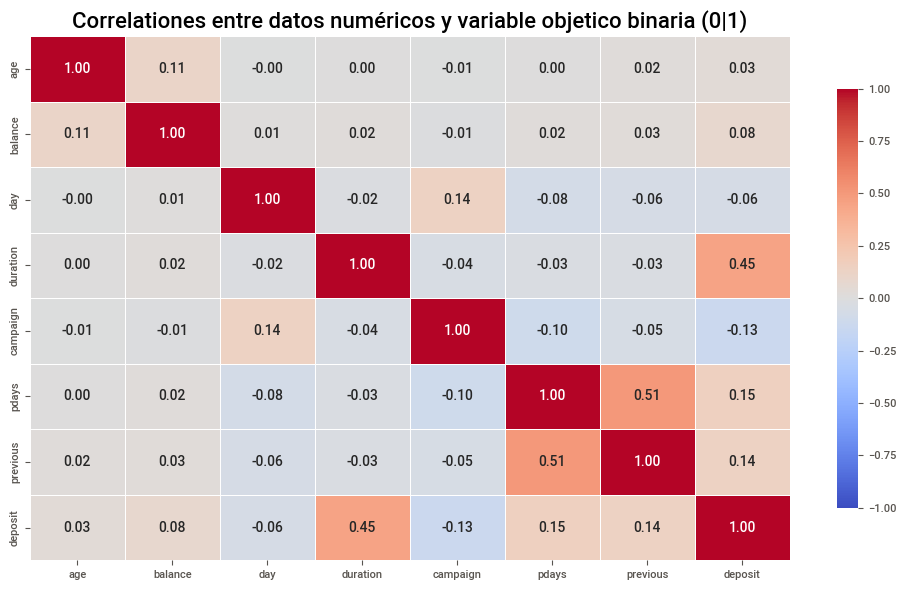

Correlaciones con 'deposit':
deposit     1.000000
duration    0.451919
pdays       0.151593
previous    0.139867
balance     0.081129
age         0.034664
day        -0.056326
campaign   -0.128081
Name: deposit, dtype: float64


In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = data_raw.select_dtypes(include=['number'])

# Calculate correlation matrix for numeric data
correlation_matrix = numeric_data.corr()

# Plot correlation heatmap with coolwarm palette
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',  # Apply the coolwarm palette
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'shrink': 0.8},  # Adjust colorbar size
    vmin=-1, vmax=1  # Ensure the color scale spans from -1 to +1
)
plt.title("Correlationes entre datos numéricos y variable objetico binaria (0|1)", fontsize=16)
plt.tight_layout()
plt.show()

# Numeric target column
if 'deposit' in numeric_data.columns:
    correlation_with_target = correlation_matrix['deposit'].sort_values(ascending=False)
    print("Correlaciones con 'deposit':")
    print(correlation_with_target)
else:
    print("La correlación no incluye la columna categórica 'deposit'")


**Análisis de correlaciones con *deposit* más relevantes**:

**duration (0.4519):** Es la variable con mayor correlación positiva con deposit. Esto confirma que llamadas más largas tienden a estar asociadas con la suscripción de depósitos (que posiblemente también incluye el tiempo de los trámites para darse de alta entre el cliente y el comercial). Sin embargo, como se explicó antes, no debe usarse para predicción ya que este dato solo se conoce después de realizar la llamada.

**pdays (0.1516)**: Esta variable muestra una correlación positiva moderada. Los clientes contactados recientemente parecen tener mayor probabilidad de contratar un depósito, lo que indica que la proximidad temporal al último contacto es un factor relevante.

**previous (0.1399):** Los clientes con más interacciones previas en campañas tienen una leve correlación positiva con la suscripción de depósitos. Este historial podría ser útil para segmentar clientes con mayor predisposición.

**balance (0.0811):** Aunque la correlación es débil, un saldo bancario más alto parece estar asociado con una mayor probabilidad de suscripción. Esto podría estar relacionado con la capacidad financiera de los clientes.

**campaign (-0.1281):** Existe una correlación negativa, lo que sugiere que demasiados intentos de contacto pueden ser contraproducentes. Esto podría reflejar una mala percepción del cliente hacia campañas demasiado insistentes.

**day (-0.0563):** La correlación negativa y débil con deposit indica que el día del mes tiene poca relevancia para predecir la suscripción.

In [136]:
# Flatten the correlation matrix and sort by absolute value
correlation_pairs = correlation_matrix.unstack()  # Flatten the matrix into a Series
correlation_pairs = correlation_pairs[correlation_pairs.index.get_level_values(0) != correlation_pairs.index.get_level_values(1)]  # Remove self-correlations
sorted_correlations = correlation_pairs.sort_values(ascending=False)  # Sort by correlation value

# Convert to DataFrame for better readability
correlation_table = sorted_correlations.reset_index()
correlation_table.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Display the sorted correlation table
print(correlation_table)


   Variable 1 Variable 2  Correlation
0    previous      pdays     0.507272
1       pdays   previous     0.507272
2     deposit   duration     0.451919
3    duration    deposit     0.451919
4     deposit      pdays     0.151593
5       pdays    deposit     0.151593
6     deposit   previous     0.139867
7    previous    deposit     0.139867
8         day   campaign     0.137007
9    campaign        day     0.137007
10        age    balance     0.112217
11    balance        age     0.112217
12    balance    deposit     0.081129
13    deposit    balance     0.081129
14        age    deposit     0.034664
15    deposit        age     0.034664
16   previous    balance     0.030805
17    balance   previous     0.030805
18   duration    balance     0.022436
19    balance   duration     0.022436
20        age   previous     0.020060
21   previous        age     0.020060
22      pdays    balance     0.017411
23    balance      pdays     0.017411
24        day    balance     0.010467
25    balanc

**Análisis de las principales correlaciones entre variables:**

**previous y pdays (0.5073):** Existe una correlación moderada entre el número de contactos previos y los días desde el último contacto. Esto refleja que clientes con un historial de interacción más largo tienden a ser contactados con mayor regularidad.

**day y campaign (0.1370):** Aunque la correlación es débil, puede sugerir que en ciertos días del mes se concentran más intentos de contacto. Esto podría deberse a estrategias específicas de la campaña.

**age y balance (0.1122):** La relación entre la edad y el saldo bancario indica que clientes mayores suelen tener balances más altos. Esto podría asociarse con estabilidad financiera o mayor capacidad de ahorro.

**pdays y balance (0.0174):** Aunque la correlación es prácticamente insignificante, podría ser interesante explorar si existe alguna relación indirecta entre el tiempo desde el último contacto y la situación financiera de los clientes.

**campaign y previous (-0.0497):** La correlación débil y negativa indica que clientes con más intentos en campañas actuales tienden a tener menos interacciones previas, lo que podría reflejar estrategias específicas hacia clientes menos recurrentes.

### Selección de variables 

Las variables descartadas (duration, month, day, poutcome) fueron eliminadas debido a su falta de relevancia o aplicabilidad en un contexto de predicción realista. Esto garantiza que el modelo se enfoque en las características con mayor poder explicativo, reduciendo el ruido y mejorando su desempeño.

**Variables a descartar:**

    - duration (duración de la llamada): Como se menciona en la descripción oficial del dataset, esta variable tiene un impacto directo en el resultado (deposit). Sin embargo, no es una variable que pueda conocerse antes de realizar la llamada, lo que hace que su inclusión en un modelo predictivo no sea realista. Puede usarse únicamente para evaluaciones comparativas, pero debe descartarse para modelado realista.

    - month (mes del contacto):Aunque el mes del contacto puede influir en el comportamiento del cliente (por ejemplo, las decisiones financieras podrían cambiar dependiendo del ciclo económico), esta variable tiene poca relevancia predictiva directa y su efecto puede ser capturado por otras variables como campaign o pdays. Además, el modelo podría aprender patrones estacionales irrelevantes si no se aplica correctamente.

    - day (día del mes):El día del mes parece tener una distribución relativamente uniforme. No hay evidencia clara de que este dato tenga una relación significativa con la probabilidad de que un cliente contrate un depósito. Por lo tanto, agregarlo al modelo podría introducir ruido sin aportar valor predictivo.

    - poutcome (resultado de campañas previas): La categoría predominante es unknown, lo que indica una falta de información relevante para la mayoría de los clientes. Esto limita su capacidad de aportar insights significativos al modelo. Además, las campañas previas ya están parcialmente representadas por variables como previous y pdays, que son más completas y directamente interpretables.


**Variables a conservar y su utilidad:** Se conservan 12 variables de las 17 iniciales

    age: Factor demográfico clave.
    job: Indicativo de estabilidad e ingresos.
    marital: Podría influir en prioridades financieras.
    education: Nivel educativo como proxy de conocimientos financieros.
    default: Capacidad de pago relevante para inversiones.
    balance: Capacidad financiera directa.
    housing: Relación entre hipoteca y liquidez.
    loan: Relación entre préstamos y decisiones financieras.
    contact: Eficiencia del canal de comunicación.
    campaign: Indicador de persistencia en la campaña.
    pdays: Historial de contacto detallado en términos de proximidad del contacto reciente
    previous: Información acumulativa directa para entender el historial del cliente con el banco
    
**pdays** y **previous:** Se decidió mantener ambas variables durante la etapa inicial para evaluar su impacto en la predicción. Sin embargo, en caso de redundancia, se priorizará pdays, ya que su contexto temporal puede ser más relevante para modelar la probabilidad de suscripción. Son diferentes en que la primera no refleja cuándo ocurrieron esos contactos, perdiendo contexto temporal; las segunda aporta un contexto temporal sobre cuánto tiempo ha pasado desde el último contacto, lo cual puede influir en la decisión del cliente, pero tiene un valor especial -1 que indica "sin contacto previo", lo que puede requerir tratamiento especial o conversión a una categoría binaria. Por sí sola, no indica la cantidad total de contactos previos
   

### Transformaciones necesarias

- ***Variables categóricas a dummificar:*** job, marital, education, contact, poutcome.

- **Variables categóricas binarias a transformar:** default, housing, loan, deposit (convertir a 0 y 1).

- **Escalado de variables numéricas:** age, balance, campaign, pdays, previous (para mejorar la efectividad en modelos como regresión logística).

### Conclusión y Resumen de la EDA

Tras la exploración de los datos, se identificaron los principales patrones y características relevantes:

- **Estado general de los datos:** El dataset está mayoritariamente limpio, con pocas ausencias (<0.1%) y valores bien estructurados.
Algunas variables, como balance y duration, mostraron alta variabilidad, mientras que variables categóricas como job y marital presentan distribuciones dominadas por ciertas categorías (management, married).

- **Valores atípicos y desequilibrio:** Variables como balance y campaign contienen outliers significativos, que deberán manejarse según su impacto en el modelo.
La variable objetivo deposit está relativamente equilibrada (52.6% no, 47.4% yes), lo cual es favorable para el modelado sin necesidad de técnicas de balanceo.

- **Variables descartadas:** Se eliminaron columnas como duration (impacta directamente el resultado), month y day (baja relevancia predictiva) y poutcome (dominio de la categoría unknown), para evitar ruido en el modelo.

- **Transformaciones necesarias:** Variables numéricas como age, balance, campaign y pdays requieren escalado ; variables categóricas como job, marital, education, contact, y otras necesitan ser dummificadas.

- **Visión general:** El dataset está listo para el preprocesamiento y selección de características finales. Las decisiones tomadas durante la EDA aseguran que el modelo se enfoque en las variables con mayor relevancia y evite el sesgo o el ruido, maximizando la probabilidad de un buen desempeño predictivo.

**Priorización de clientes:**

El banco debería enfocar sus esfuerzos en clientes con balances positivos elevados, buen historial de contacto y características demográficas estables como edad mediana y educación superior. Además, priorizar contactos recientes y canales móviles podría aumentar la efectividad de las campañas. Este enfoque optimiza los recursos y maximiza las probabilidades de conversión.

- Clientes con historial positivo: aquellos que interactuaron recientemente (pdays bajos) o con experiencias exitosas en campañas previas (poutcome).

- Segmentos con mayor **capacidad económica**: clientes con saldos elevados (balance) y sin deudas pendientes (default).

- Segmentos **demográficos** específicos: Personas de mediana edad, casadas y con educación secundaria o terciaria.

- Optimización del **canal**: priorizar contactos por móvil (contact = cellular) en lugar de teléfono fijo.

- Persistencia eficiente (**historial de contacto)** con los clientes: centrarse en clientes con menos intentos de contacto previos ('campaign' bajo) que puedan responder mejor si se perciben como una prioridad individual. Ello evita desgastar recursos en clientes menos receptivos, pero la decisión de priorizar a los clientes más o menos contactados anteriormente depende de cómo interpretar los datos y la estrategia del banco. Un historial positivo de interacción aumenta la probabilidad de éxito, pero si no respondieron favorablemente en varias interacciones previas, su probabilidad de conversión podría ser baja. 